Importar paquetes

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

Cargar datos

In [49]:
data=pd.read_csv('../data/raw/train.csv')

Ver muestra

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mostrar información de estructura de datos 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Mostrar estadisticas de campos numericos

In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mostrar estadisitcas de datos no numericos (Objetos)

In [53]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


tamaño dataset

In [54]:
data.shape

(891, 12)

Indentificador outliners

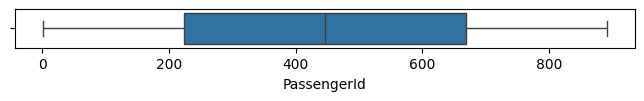

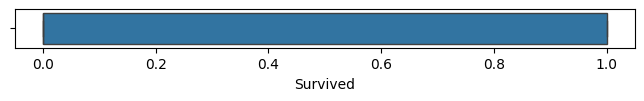

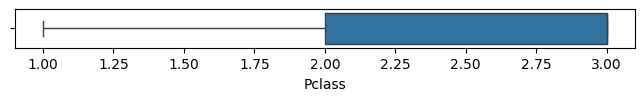

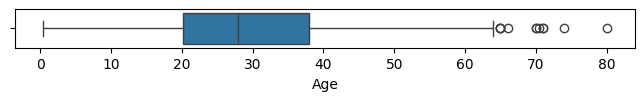

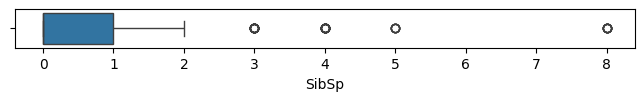

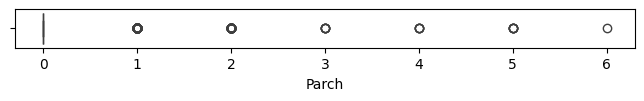

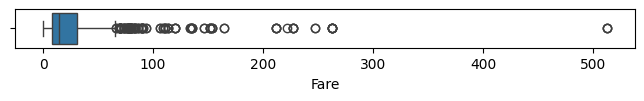

In [55]:
cols = data.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(8,0.5))
    sns.boxplot(data[cols], x=col)

In [56]:
outliers = {}
for col in cols:
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)

    iqr = q1 - q3
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 2.5 * iqr
    
    outliers [col] = (data[col] < upper_bound).sum() + (data[col] > lower_bound).sum()

    print (f"outliers in {col}: {outliers[col]}")

outliers in PassengerId: 0
outliers in Survived: 0
outliers in Pclass: 0
outliers in Age: 0
outliers in SibSp: 74
outliers in Parch: 213
outliers in Fare: 171


In [57]:
outliers = {}
for col in cols:
    mean = data[col].mean()
    std = data[col].std()

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    outliers [col] = ((data[col] > upper_bound) | (data[col] < lower_bound)).sum ()

    print (f"outliers in {col}: {outliers[col]}")

outliers in PassengerId: 0
outliers in Survived: 0
outliers in Pclass: 0
outliers in Age: 2
outliers in SibSp: 30
outliers in Parch: 15
outliers in Fare: 20


Grafica outliers

<Axes: xlabel='Age', ylabel='Count'>

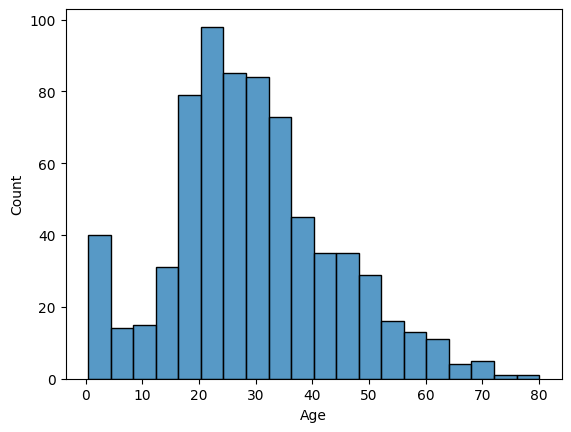

In [58]:
sns.histplot(data["Age"])

Valores nulos

isna - encontrar valores 
dropna - elina datos con valore nulos
drop - elimina columnas

In [59]:
data.isna().sum() / len (data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Eliminar valores nulos

In [60]:
#data.Cabin.dropna().count()
len(data.Cabin.dropna())

204

In [61]:
len(data.dropna(how="any"))

183

Borrado de columnas

In [62]:
#data.drop(["Cabin"],axis = 1, inplace =True)

Imputar valores con la mediana 

In [67]:
imputer = SimpleImputer(strategy="median")
print("Median age:", data ["Age"].median())
print("Nulos age:", data ["Age"].isna().sum())

salida= imputer.fit_transform(data[["Age"]])
salida= pd.DataFrame(salida)

print("Nulo imputed Age:", salida.isna().sum())
print("Salida mediana: ", salida.median())


Median age: 28.0
Nulos age: 177
Nulo imputed Age: 0    0
dtype: int64
Salida mediana:  0    28.0
dtype: float64
